In [1]:
from arcgis import *
import pandas as pd
import numpy as np

In [2]:
gis = GIS()

In [5]:
source_file = r'FPA_FOD_20221014.gdb\Fires' # file path to Fires FC downloaded from the GDB on https://www.fs.usda.gov/rds/archive/catalog/RDS-2013-0009.6

In [6]:
from arcgis.features import GeoAccessor, GeoSeriesAccessor

wildfires_df = pd.DataFrame.spatial.from_featureclass(source_file)

In [7]:
wildfires_df.shape

(2303566, 39)

In [11]:
df = wildfires_df[['FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'STATE', 'FIPS_CODE', 'FIPS_NAME', 'SHAPE']]

In [12]:
df.head()

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_GENERAL_CAUSE,FIRE_SIZE,STATE,FIPS_CODE,FIPS_NAME,SHAPE
0,2005,2/2/2005,33,Power generation/transmission/distribution,0.10,CA,06063,Plumas County,"{""x"": -121.00582004599994, ""y"": 40.03693920200..."
1,2004,5/12/2004,133,Natural,0.25,CA,06061,Placer County,"{""x"": -120.40443139699994, ""y"": 38.93305036700..."
2,2004,5/31/2004,152,Debris and open burning,0.10,CA,06017,El Dorado County,"{""x"": -120.73554245799994, ""y"": 38.98416149800..."
3,2004,6/28/2004,180,Natural,0.10,CA,06003,Alpine County,"{""x"": -119.91332041199996, ""y"": 38.55916147300..."
4,2004,6/28/2004,180,Natural,0.10,CA,06003,Alpine County,"{""x"": -119.93304263899995, ""y"": 38.55916147400..."


In [39]:
pd.options.mode.chained_assignment = None 

df['MONTH'] = pd.DatetimeIndex(df['DISCOVERY_DATE']).month
df['Date'] = pd.to_datetime(df['DISCOVERY_DATE'], errors='coerce')
df['DAY_OF_WEEK'] = df['Date'].dt.dayofweek
df_arson = df[df['NWCG_GENERAL_CAUSE']=='Arson/incendiarism']
dfa = df_arson['DAY_OF_WEEK'].value_counts()
df_lightning = df[df['NWCG_GENERAL_CAUSE']=='Natural']
dfl = df_lightning['DAY_OF_WEEK'].value_counts()

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sorted_df = df.sort_values('FIRE_YEAR')
fire_freq = sorted_df.groupby('FIRE_YEAR').count()
x = np.asarray(fire_freq.axes[0])
x = x.astype('float64')
y = np.asarray(df.groupby('FIRE_YEAR').size())
y = y.astype('float64')

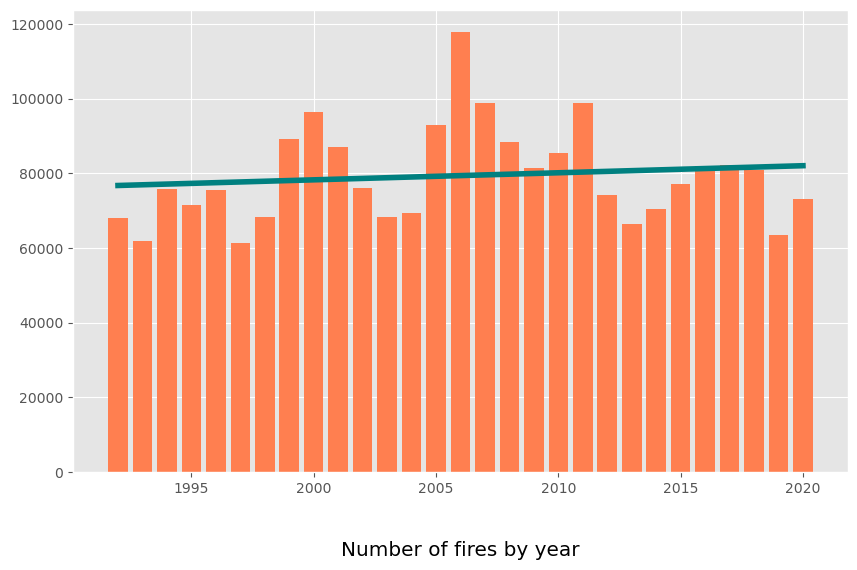

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, y, color='coral')
plt.title('Number of fires by year', y=-0.2)
fit1 = np.polyfit(x, y, deg=1)
ax.plot(x, x*fit1[0] + fit1[1], color='teal', linewidth=4);

In [26]:
distribution = df['NWCG_GENERAL_CAUSE'].value_counts()

(-1.0999999392125928, 1.0999999971053616, -1.0999993483401052, 1.0999998942689484)

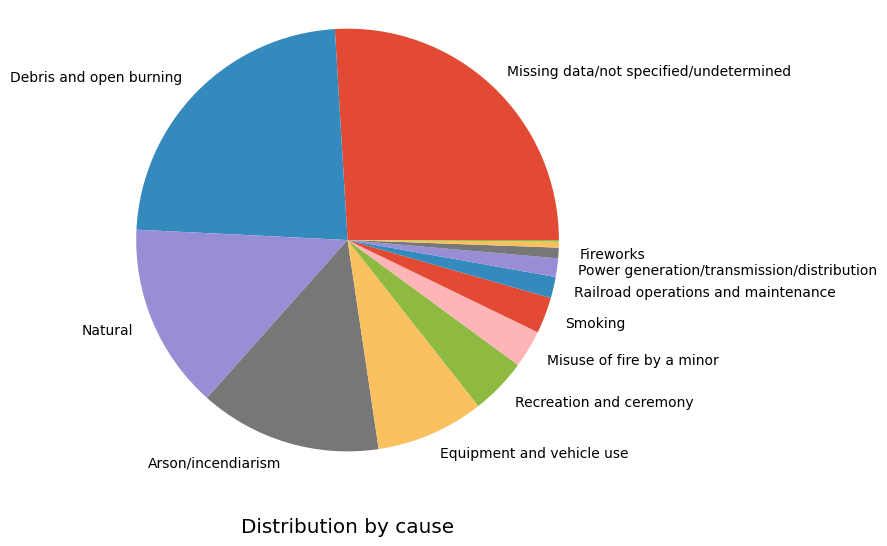

In [27]:
plt.figure(figsize=(6,6))
plt.title('Distribution by cause', y=-0.15)
plt.pie(distribution, labels=list(distribution.index[:-2]) + ['', '']);
plt.axis('equal');

[40]:9: UserWarning: FixedFormatter should only be used together with FixedLocator


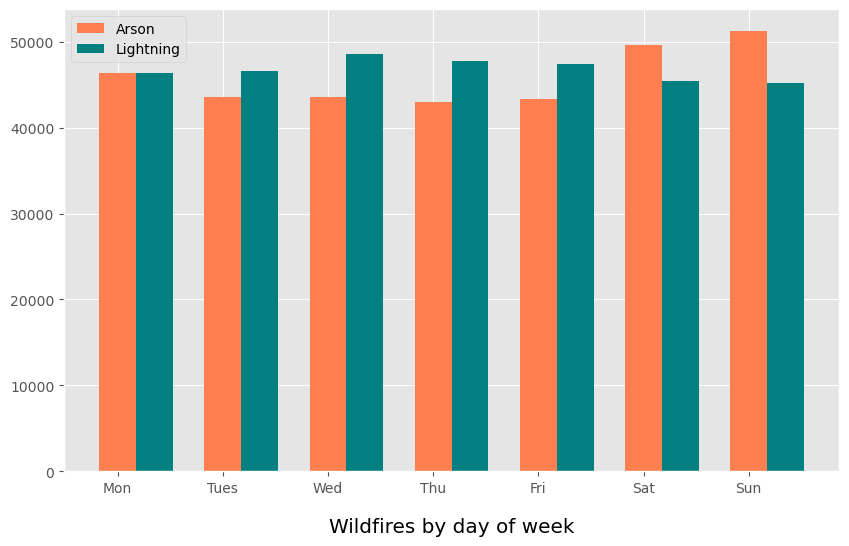

In [40]:
ind = np.arange(7) 
width = 0.35       

fig, ax   = plt.subplots(figsize=(10,6))
arson     = ax.bar(ind, dfa.sort_index(), width, color='coral')
lightning = ax.bar(ind + width, dfl.sort_index(), width, color='teal')

ax.set_title('Wildfires by day of week', y=-0.15)
ax.set_xticklabels(('', 'Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
ax.legend((arson[0], lightning[0]), ('Arson', 'Lightning'), loc=2);

In [44]:
df['x'] = df.SHAPE.apply(lambda g: g['x'])
df['y'] = df.SHAPE.apply(lambda g: g['y'])
smdf = wildfires_df[['FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'STATE', 'FIPS_CODE', 'FIPS_NAME', 'LATITUDE', 'LONGITUDE']]
smdf.to_pickle(r'C:\Users\helfmanj\OneDrive - Weston Solutions, Inc\Documents\ArcGIS\Projects\Wildfires\fires.pkl')

In [45]:
analysis_variables = [
    'TOTPOP_CY',  # 2016 Population: Total Population (Esri)
    'HHPOP_CY',   # 2016 Household Population (Esri)
    'FAMPOP_CY',  # 2016 Family Population (Esri)
    'DIVINDX_CY', # 2016 Diversity Index (Esri)
    'TOTHH_CY',   # 2016 Total Households (Esri)
    'AVGHHSZ_CY', # 2016 Average Household Size (Esri)

    'MALES_CY',   # 2016 Gender: Male Population (Esri)
    'FEMALES_CY', # 2016 Gender: Female Population (Esri)
    
    'MEDAGE_CY',  # 2016 Age: Median Age (Esri)
    
    'AVGFMSZ_CY', # 2016 Income: Average Family Size (Esri)
    'MEDHINC_CY', # 2016 Income: Median Household Income (Esri)
    'AVGHINC_CY', # 2016 Income: Average Household Income (Esri)
        
    'EDUCBASECY', # 2016 Educational Attainment Base (Esri)
    'NOHS_CY',    # 2016 Education: Less than 9th Grade (Esri)
    'SOMEHS_CY',  # 2016 Education: 9-12th Grade/No Diploma (Esri)
    'HSGRAD_CY',  # 2016 Education: High School Diploma (Esri)
    'GED_CY',     # 2016 Education: GED/Alternative Credential (Esri)
    'SMCOLL_CY',  # 2016 Education: Some College/No Degree (Esri)
    'ASSCDEG_CY', # 2016 Education: Associate's Degree (Esri)
    'BACHDEG_CY', # 2016 Education: Bachelor's Degree (Esri)
]